<center>


<div style="display: flex; justify-content: center;">
    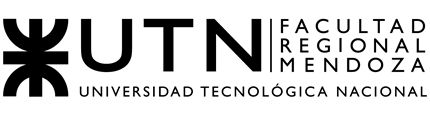
</div>
</center>
<center>
    <div style="font-family: 'Georgia', serif; font-size: 24px;">
        <p><strong>Ingeniería en Electrónica. Análisis de Señales y Sistemas</strong></p>
    </div>
</center>

# Trabajo Práctico $N^{\circ}4$: Análisis de Fourier en tiempo discreto

En el ámbito del procesamiento de señales discretas, existen varias razones que justifican la utilización de la Transformada de Fourier en Tiempo Discreto (DTFT) y sus versiones computacionales más utilizadas: la Transformada de Fourier Discreta (DFT) y la Transformada Rápida de Fourier (FFT).

La idea central del **Análisis de Fourier** es una herramienta matemática increíblemente poderosa que nos permite "descomponer" una señal compleja (como una onda de audio, una vibración o incluso una imagen) en la suma de sus partes fundamentales: un conjunto de ondas senoidales simples, cada una con una frecuencia, amplitud y fase específicas.

Al hacer esto, pasamos de ver la señal en el **"dominio del tiempo"** (cómo cambia su amplitud a medida que pasa el tiempo) al **"dominio de la frecuencia"** (cuánta energía o "presencia" tiene la señal en cada frecuencia).

Algunas de las principales aplicaciones incluyen:

- **Análisis de Audio**: Permite analizar el "contenido frecuencial" o "espectro" de un sonido. Esto es la base de los ecualizadores (que suben o bajan el volumen de rangos de frecuencia, como los "bajos", "medios" y "altos"), la eliminación de ruido (identificando la frecuencia del ruido y filtrándola) y la compresión de datos (como en el formato MP3, que elimina frecuencias que el oído humano apenas percibe).

- **Procesamiento de Imágenes**: En una imagen, la "frecuencia" no es temporal, sino **espacial**.
    - **Bajas frecuencias espaciales** corresponden a cambios suaves y lentos de color o brillo (como un cielo despejado o una pared lisa).
    - **Altas frecuencias espaciales** corresponden a cambios rápidos y abruptos (como los bordes de un objeto, la textura de una tela o el "grano" en una foto).
    Al aplicar la FFT 2D, podemos diseñar filtros para, por ejemplo, suavizar una imagen (eliminar altas frecuencias) o detectar bordes (realzar altas frecuencias).

- **Telecomunicaciones**: El análisis en frecuencia es clave para la **multiplexación por división de frecuencia (FDM)**. Esto permite que múltiples señales (como diferentes estaciones de radio o canales de TV) viajen por el mismo medio (el aire) al mismo tiempo sin interferirse, simplemente asignando a cada una un "carril" de frecuencia diferente.

- **Diagnóstico de Sistemas**: En el análisis de vibraciones, cada componente de una máquina (un motor, un rodamiento) vibra a una frecuencia característica cuando funciona correctamente. Si una pieza empieza a fallar, generará vibraciones a nuevas frecuencias. Usando la FFT, un técnico puede ver el espectro de vibración y diagnosticar fallos antes de que ocurran fallas catastróficas.

### Diferencias entre DTFT, DFT y FFT

Este es un punto clave. La diferencia fundamental radica en si tratamos con señales teóricas (infinitas) o señales reales (finitas) que una computadora puede procesar.

- **Transformada de Fourier en Tiempo Discreto (DTFT)**:
    - **Entrada:** Una señal discreta en el tiempo (es decir, muestreada) que se asume de duración **infinita**.
    - **Salida:** Un espectro de frecuencia que es **continuo** (no está muestreado).
    - **Uso:** Es una herramienta puramente **teórica** y analítica. No podemos calcularla en una computadora porque requeriría infinitas muestras de entrada y produciría un espectro *continuo* (que tendría infinitos puntos de frecuencia para almacenar).

- **Transformada de Fourier Discreta (DFT)**:
    - **Entrada:** Una señal discreta en el tiempo y de duración **finita** (un número $N$ de muestras).
    - **Salida:** Un espectro de frecuencia que también es **discreto** (compuesto exactamente por $N$ puntos o "bins" de frecuencia).
    - **Uso:** Esta es la versión **computable** de la DTFT. Es lo que realmente usamos en las computadoras y en Python. La DFT toma un "trozo" finito de nuestra señal y calcula su espectro en un número finito de puntos de frecuencia.

- **Transformada Rápida de Fourier (FFT)**:
    - **No es una transformada nueva.** Es simplemente un conjunto de **algoritmos** (como el famoso algoritmo de Cooley-Tukey) extremadamente eficientes diseñados para calcular la DFT.
    - Su descubrimiento revolucionó el procesamiento digital de señales, haciéndolo lo suficientemente rápido para aplicaciones en tiempo real.

**Nota sobre Complejidad Computacional**: La complejidad computacional se refiere al tiempo que un algoritmo tarda en ejecutarse, en función de la cantidad de datos ($N$) que procesa.
-   Calcular la DFT directamente tiene una complejidad de $O(N^2)$ (Orden N-cuadrado).
-   Calcular la DFT usando el algoritmo FFT tiene una complejidad de $O(N \log N)$.

Esta diferencia es drástica. Para señales con muchas muestras ($N$ muy grande), la FFT es cientos de veces más rápida que la DFT directa.

### Objetivos del Trabajo Práctico
El objetivo de este trabajo práctico es proporcionar una comprensión profunda del análisis de Fourier en tiempo discreto y cómo aplicarlo de manera efectiva utilizando herramientas computacionales como Python. Exploraremos cómo realizar la Transformada de Fourier Discreta de señales, interpretar el espectro de frecuencia, y aplicar filtros en el dominio de la frecuencia para manipular las señales. Además, se busca que los estudiantes desarrollen la capacidad de interpretar y analizar espectros de frecuencia en aplicaciones prácticas.

## Uso de la función `fft` de Scipy

Para calcular la Transformada Rápida de Fourier (FFT), utilizaremos la función `fft` del módulo `scipy.fft`.

### Uso Básico de `fft`

El uso básico de `fft` es directo y permite transformar una señal en el dominio del tiempo al dominio de la frecuencia:

In [1]:
from scipy.fft import fft

# Definimos una señal de ejemplo
data = [0.0, 1.0, 0.0, -1.0]

# Calculamos la FFT de la señal
data_fft = fft(data)
data_fft


array([0.-0.j, 0.-2.j, 0.-0.j, 0.+2.j])

En este ejemplo, `data` contiene valores de una señal discreta en el tiempo, y `fft(data)` devuelve su representación en el dominio de la frecuencia como `data_fft`, con coeficientes complejos que corresponden a las diferentes componentes de frecuencia.

### Ejemplo Completo con `fft` y `fftfreq`

Vamos a realizar un ejemplo completo paso a paso. Para visualizar los resultados de la `fft`, no solo necesitamos el vector de amplitudes (`x_fft`), sino también el vector de frecuencias (`frecuencias`) al que corresponde cada amplitud.

Para esto, usaremos la función `fftfreq` de `scipy`.

La función `fftfreq` toma dos parámetros principales:
- **N**: La cantidad de muestras de la señal (el número de puntos en el dominio temporal).
- **T**: El intervalo de tiempo entre cada muestra (el **período de muestreo**, $ T = \frac{1}{f_s}$, donde $f_s$ es la frecuencia de muestreo).

El resultado de `fftfreq(N, T)` es un vector con $N$ valores de frecuencia. Nos dice qué frecuencia (en Hz) corresponde a cada uno de los $N$ puntos que calculó la `fft`.

Primero importaremos las funciones y librerías necesarias.

In [2]:
import numpy as np
from scipy.fft import fftfreq
import matplotlib.pyplot as plt

Como ejemplo vamos a graficar una señal senoidal de frecuencia de 50 Hz.

Crearemos un vector que llamaremos `t` que representará el tiempo y otro vector `x` que representará la señal senoidal.

Para definir nuestra señal, necesitamos establecer:
1.  **`N` (Número de muestras):** Cuántos puntos tomaremos. Usaremos 4000.
2.  **`T` (Período de muestreo):** El tiempo entre un punto y el siguiente. Usaremos 0.0001 segundos (0.1 ms).
3.  **`fs` (Frecuencia de muestreo):** Es la inversa de T ($f_s = 1/T$). En nuestro caso, $f_s = 1 / 0.0001 = 10000 Hz$. (Esto cumple sobradamente el Teorema de Nyquist, que exigiría $f_s > 2 \times 50 Hz = 100 Hz$).
4.  **`t` (Vector de tiempo):** Usando `linspace`, creamos 4000 puntos desde `0.0` hasta `N*T` (0.4 segundos).

In [3]:
# Constantes de la señal
N = 4000  # Número de muestras de la señal
T = 0.0001  # Intervalo de muestreo (fs = 1/T = 10000 Hz)
t = np.linspace(0.0, N*T, N)  # Vector de tiempo (Duración total = N*T = 0.4s)
x = np.sin(50.0 * 2.0*np.pi * t)   # Señal sinusoide de frecuencia f = 50 Hz

Ahora que tenemos nuestra señal `x` en el tiempo, calcularemos su FFT.

In [4]:
# 1. Transformada de Fourier de la señal
x_fft = fft(x)

# 2. Vector de frecuencias correspondientes
frecuencias = fftfreq(N, T)

###  Una explicación clave: Normalización de la Amplitud

Si inspeccionamos `x_fft`, veremos números complejos muy grandes. La salida de la FFT de `scipy` está escalada por un factor de $N$ (el número de muestras). Para obtener la amplitud real de la señal, debemos "normalizar" este resultado.

Hay dos cosas que considerar:

1.  **Escalado por $N$:** Para revertir el escalado del algoritmo, debemos dividir la salida de la FFT por $N$. ( `np.abs(x_fft) / N` ).
2.  **Simetría de Señales Reales:** Nuestra señal `x` es "real" (no tiene números imaginarios). Una propiedad fundamental de las señales reales es que su espectro de Fourier es simétrico. La energía de nuestra senoide de 50 Hz se divide por igual: la mitad va al pico de $+50 Hz$ y la otra mitad al pico de $-50 Hz$.

Si dividimos `np.abs(x_fft) / N`, y la amplitud de nuestra senoide era 1.0, los picos en la gráfica de FFT tendrían un valor de 0.5 cada uno.

**¿Cómo hacemos para que el pico en la gráfica muestre la amplitud original (1.0)?**

Simple: tomamos la amplitud escalada por $N$ (`np.abs(x_fft) / N`) y la multiplicamos por 2 para "recuperar" la energía del pico negativo y sumarla al positivo.

Esto nos da la fórmula: `Amplitud = (np.abs(x_fft) / N) * 2` , que es lo mismo que: `Amplitud = np.abs(x_fft) / (N / 2)`

*Nota: Esta normalización por `N/2` se aplica a todas las frecuencias excepto a la componente de DC (frecuencia 0), que solo se divide por `N` porque no tiene una contraparte negativa.*

In [5]:
# 3. Normalización de la amplitud (para un espectro de "una cara")
amplitud_normalizada = np.abs(x_fft) / (N / 2)

Finalmente, graficamos la señal original y su espectro de frecuencia.

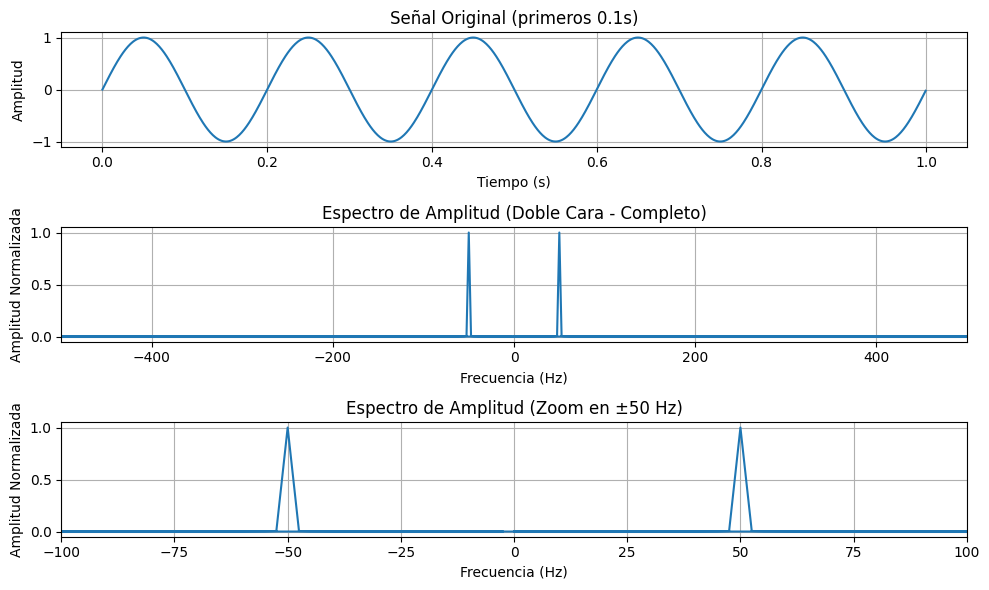

In [41]:
# Graficamos la señal original y su espectro de frecuencia (versión mejorada con zoom)

# Definimos fs para usarla en el límite del gráfico
fs = 1/T

# Ajustamos el tamaño de la figura para que quepan tres gráficos
plt.figure(figsize=(10, 6))

# --- Gráfico 1: Señal en el Dominio del Tiempo ---
plt.subplot(3, 1, 1) # Cambiamos a 3 filas, 1 columna, gráfico 1
plt.plot(t[0:1000], x[0:1000])
plt.title('Señal Original (primeros 0.1s)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)

# --- Gráfico 2: Espectro de Frecuencia Completo ---
plt.subplot(3, 1, 2) # Cambiamos a 3 filas, 1 columna, gráfico 2
# Graficamos el vector de frecuencias contra la amplitud normalizada
plt.plot(frecuencias, amplitud_normalizada)
plt.title('Espectro de Amplitud (Doble Cara - Completo)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud Normalizada')
# Mostramos el espectro completo hasta la frecuencia de Nyquist (fs/2)
plt.xlim(-fs/2, fs/2)
plt.grid(True)

# --- Gráfico 3: Zoom en el Espectro ---
# Este es el nuevo gráfico que solicitaste
plt.subplot(3, 1, 3) # Cambiamos a 3 filas, 1 columna, gráfico 3
plt.plot(frecuencias, amplitud_normalizada)
plt.title('Espectro de Amplitud (Zoom en ±50 Hz)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud Normalizada')
# Aplicamos el ZOOM: Limitamos el eje x de -100 Hz a 100 Hz
plt.xlim(-100, 100)
plt.grid(True)

# Ajusta los gráficos para que no se superpongan
plt.tight_layout()
plt.show()

Podemos ver un espectro de amplitud simétrico con componentes (picos) exactamente en $50Hz$ y $-50Hz$. Gracias a nuestra normalización por `N/2`, la amplitud de estos picos es 1.0, que coincide con la amplitud de nuestra señal original `x = 1.0 * np.sin(...)`.

### 🎯 Ejercicio 1: Suma de Senoidales

Ahora que entendemos el proceso, vamos a aplicar el principio de superposición. La Transformada de Fourier es lineal, lo que significa que la transformada de una suma de señales es igual a la suma de sus transformadas.

**Objetivo:** Añadir una segunda señal senoidal a `x` y observar cómo cambia el espectro.

**Pasos:**
1.  Crear una nueva señal `x2` que sea una senoidal con frecuencia $f2 = 80Hz$ y amplitud 0.5. (Usar el mismo vector de tiempo `t`).
2.  Crear una señal compuesta `y` que sea la suma de `x` (la de 50 Hz) y `x2` (la de 80 Hz).
3.  Calcular la FFT de la señal `y` ( `y_fft = fft(y)` ).
4.  Normalizar la amplitud de `y_fft` usando el método de `N/2` que aprendimos.
5.  Graficar el espectro de amplitud de `y` ( `frecuencias` vs. `amplitud_normalizada_y` ).
6.  Graficar la señal `y` en el tiempo para ver cómo se ve la onda compuesta.*

Agregue todas las celdas de texto y código que necesite para realizar el ejercicio.

###  Ejercicio 2: Espectro de una Onda Cuadrada

Las ondas senoidales son simples (solo tienen un pico en la frecuencia), pero otras formas de onda, como las cuadradas o triangulares, están compuestas por una **suma infinita de senoidales** (armónicos).

**Objetivo:** Calcular y visualizar el espectro de una onda cuadrada.

**Pasos:**
1.  Importar `signal` desde `scipy` ( `from scipy import signal` ).
2.  Crear una señal `x_cuadrada` usando `signal.square(2.0 * np.pi * f * t)`. Usa una frecuencia `f = 25Hz`.
3.  Calcular la FFT de `x_cuadrada`.
4.  Normalizar la amplitud.
5.  Graficar el espectro. ¿Qué observas? Deberías ver un pico en la frecuencia fundamental (25 Hz) y luego picos más pequeños en sus armónicos impares (75 Hz, 125 Hz, 175 Hz, etc.).

Agregue todas las celdas de texto y código que necesite para realizar el ejercicio.

## Construyendo Intuición: FFT Interactiva

Hasta ahora hemos analizado señales "estáticas". Para desarrollar una mejor intuición de cómo los cambios en el tiempo afectan a la frecuencia, crearemos una figura interactiva usando `ipywidgets`.

In [42]:
from ipywidgets import interactive
import ipywidgets as widgets

Primero, definimos los parámetros fijos de nuestro entorno de prueba.
Usaremos una frecuencia de muestreo $f_s = 1000 Hz$, por lo que $T = 0.001 s$.

In [43]:
# Parámetros fijos de la señal
fs = 1000  # Frecuencia de muestreo (fs = 1000 Hz)
N = 4000  # Número de muestras de la señal
T = 1.0 / fs  # Intervalo de muestreo (T = 0.001 s)
t = np.linspace(0.0, N * T, N)  # Vector de tiempo de 4 segundos (4000 muestras en total)

Ahora, definimos una función que recalcula y redibuja las gráficas cada vez que movemos un *slider*.

Nota sobre la normalización en este gráfico:
Observa que aquí dividimos por `N` y no por `N/2`. Esto es una elección de visualización. Al dividir solo por `N`, mostramos el espectro de "doble cara" donde la amplitud original (ej: 1.0) se divide entre el pico positivo (0.5) y el negativo (0.5). Esto es útil para ver la simetría claramente.

In [44]:
# Función para actualizar la señal y su FFT
def actualizar_grafico(frecuencia=50.0, amplitud=1.0):
    # Generación de la señal sinusoidal con los parámetros variables
    x = amplitud * np.sin(frecuencia * 2.0 * np.pi * t)

    # Cálculo de la FFT
    x_fft = fft(x)
    frecuencias = fftfreq(N, T)

    # Crear las figuras
    plt.figure(figsize=(9, 4))

    # Subplot de la señal en el dominio del tiempo (mostrando solo el primer segundo)
    plt.subplot(2, 1, 1)
    plt.plot(t[:fs], x[:fs])  # Mostrar solo el primer segundo de la señal (primeras 1000 muestras)
    plt.title('Señal en el Tiempo (Primer Segundo)')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.ylim(-2, 2)  # Fija la amplitud en el eje y
    plt.grid()

    # Subplot del espectro de frecuencias
    plt.subplot(2, 1, 2)
    # Normalización por N (picos de amplitud/2)
    plt.plot(frecuencias, np.abs(x_fft) / N)
    plt.title('Espectro de amplitud (Doble Cara, pico = Amplitud/2)')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Amplitud Normalizada')
    # Hacemos zoom de -100 a 100 Hz
    plt.xlim(-100, 100)
    plt.ylim(0, 1)  # Eje de amplitudes fijo
    plt.grid()

    plt.tight_layout()
    plt.show()

Finalmente, usamos la función `interactive` para conectar nuestra función `actualizar_grafico` a dos *sliders* (deslizadores): uno para la frecuencia y otro para la amplitud.

In [45]:
# Crear la interacción
interactive_plot = interactive(
    actualizar_grafico,
    frecuencia=(1, 100, 1),  # Slider de Frecuencia: de 1 a 100 Hz, en pasos de 1 Hz
    amplitud=(0.1, 2, 0.1)      # Slider de Amplitud: de 0.1 a 2.0, en pasos de 0.1
)
display(interactive_plot)

interactive(children=(IntSlider(value=50, description='frecuencia', min=1), FloatSlider(value=1.0, description…

## Transición: De Señales a Sistemas

Hemos explorado el **Análisis de Fourier** (DFT/FFT), que es la herramienta que nos permite ver *de qué* está compuesta una señal (su espectro).

Ahora, cambiaremos nuestro enfoque para analizar los **Sistemas LTI** (Lineales e Invariantes en el Tiempo). Estos sistemas son los "procesadores" de señales: toman una señal de entrada $x(t)$ y entregan una señal de salida $y(t)$.

Usaremos `scipy.signal` para analizar cómo estos sistemas (definidos por sus ecuaciones diferenciales o funciones de transferencia) responden a diferentes estímulos.

# Utilidades de python Para sistemas LTI descrito por su función de transferencia

## Sistemas LTI continuos

En esta sección, exploraremos cómo la biblioteca `scipy.signal` de Python nos permite modelar y analizar sistemas **LTI (Lineales e Invariantes en el Tiempo)** en el dominio continuo.

Un sistema LTI es un "bloque" que procesa una señal de entrada $x(t)$ para producir una señal de salida $y(t)$. Lo que lo hace especial es que obedece a dos principios:
1.  **Linealidad:** Si la entrada es una suma de señales ($a \cdot x_1(t) + b \cdot x_2(t)$), la salida es la suma de sus respuestas ($a \cdot y_1(t) + b \cdot y_2(t)$).
2.  **Invariancia en el Tiempo:** Si retardas la entrada en el tiempo, la salida se retarda exactamente la misma cantidad, sin cambiar su forma.

Estos sistemas se describen matemáticamente mediante ecuaciones diferenciales, o más comúnmente en nuestro campo, mediante su **Función de Transferencia** $H(s)$ en el dominio de Laplace.

### Uso Básico de lti

La función `lti` (`scipy.signal.lti`) nos permite crear un objeto que representa al sistema a partir de los coeficientes de su función de transferencia $H(s)$.

Recordemos que $H(s)$ es la relación entre la transformada de Laplace de la salida $Y(s)$ y la transformada de Laplace de la entrada $X(s)$:

$$
H(s) = \frac{Y(s)}{X(s)} = \frac{\text{polinomio del numerador}}{\text{polinomio del denominador}}
$$

Para usar `lti`, le pasamos dos listas (o arrays de numpy) que contienen los coeficientes de estos polinomios, en orden de potencia **decreciente** de $s$.

Definamos un sistema de ejemplo:
$$
H(s) = \frac{s+5}{s^2 + 3s + 2}
$$

In [14]:
from scipy.signal import lti

# H(s) = (1*s + 5) / (1*s^2 + 3*s + 2)

# Coeficientes del numerador (s + 5)
numerador = [1, 5]
# Coeficientes del denominador (s^2 + 3s + 2)
denominador = [1, 3, 2]

# Crear el objeto 'sistema' LTI
sistema = lti(numerador, denominador)

print(sistema)

TransferFunctionContinuous(
array([1., 5.]),
array([1., 3., 2.]),
dt: None
)


Este objeto `sistema` que acabamos de crear contiene toda la información de la ecuación diferencial asociada:
$$
\frac{d^2y(t)}{dt^2} + 3\frac{dy(t)}{dt} + 2y(t) = \frac{dx(t)}{dt} + 5x(t)
$$

### Operaciones Comunes con `lti`

Una vez definido el objeto `sistema`, podemos analizarlo de varias maneras para entender su comportamiento.

#### 1. Respuesta al impulso

**¿Qué es?** La **respuesta al impulso**, $h(t)$, es la salida teórica del sistema cuando la entrada es un "impulso" perfecto (conocido como Delta de Dirac, $\delta(t)$).

**¿Por qué es importante?** Esta respuesta es como la "huella dactilar" del sistema. Define completamente su comportamiento. De hecho, la respuesta al impulso $h(t)$ es la Transformada Inversa de Laplace de la propia función de transferencia $H(s)$.

**En Python:** Usamos el método `.impulse()` del objeto `sistema`. Este nos devuelve dos vectores: `t` (el vector de tiempo) y `y_impulso` (la respuesta $h(t)$).

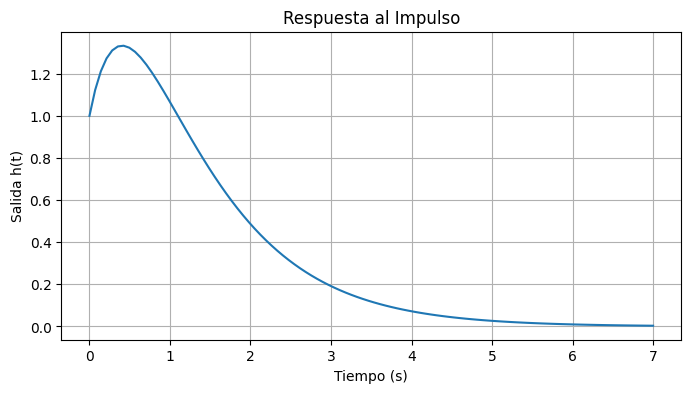

In [15]:
# Calcular la respuesta al impulso
t_imp, y_impulso = sistema.impulse()

# Graficar
plt.figure(figsize=(8, 4))
plt.plot(t_imp, y_impulso)
plt.xlabel('Tiempo (s)')
plt.ylabel('Salida h(t)')
plt.title('Respuesta al Impulso')
plt.grid(True)
plt.show()

#### 2. Respuesta al escalón

**¿Qué es?** La **respuesta al escalón** es la salida del sistema cuando la entrada es un "escalón" unitario, $u(t)$ (una señal que es 0 para $t<0$ y 1 para $t \ge 0$).

**¿Por qué es importante?** Es la prueba más común para caracterizar un sistema. Nos permite ver visualmente:
-   **Ganancia en estado estacionario:** El valor final al que se estabiliza la salida.
-   **Tiempo de subida (Rise time):** Cuánto tarda en ir del 10% al 90% del valor final.
-   **Sobreoscilación (Overshoot):** Cuánto "se pasa" del valor final antes de estabilizarse.
-   **Tiempo de estabilización (Settling time):** Cuánto tarda en quedarse cerca del valor final.

**En Python:** Usamos el método `.step()`. Devuelve `t` (tiempo) y `y_escalon` (la respuesta).

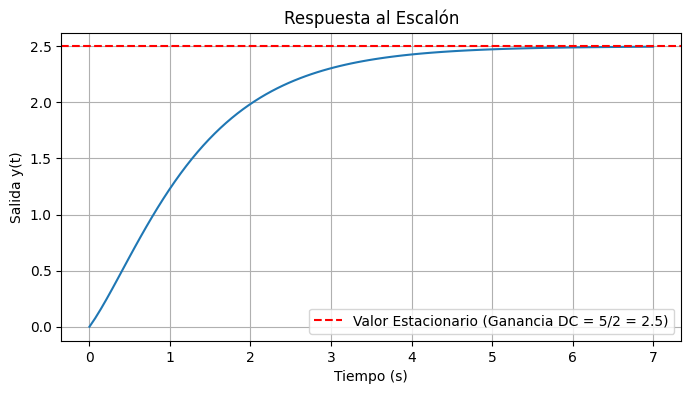

In [16]:
# Calcular la respuesta al escalón
t_esc, y_escalon = sistema.step()

# Graficar
plt.figure(figsize=(8, 4))
plt.plot(t_esc, y_escalon)
plt.xlabel('Tiempo (s)')
plt.ylabel('Salida y(t)')
plt.title('Respuesta al Escalón')
plt.axhline(y=2.5, color='r', linestyle='--', label='Valor Estacionario (Ganancia DC = 5/2 = 2.5)') # Ganancia DC = H(s=0)
plt.legend()
plt.grid(True)
plt.show()

#### 3. Respuesta a una entrada arbitraria (respuesta temporal)

**¿Qué es?** Esta es la simulación más general. La función `lsim` (simulación lineal) calcula la respuesta del sistema $y(t)$ a *cualquier* señal de entrada arbitraria $x(t)$ que le proporcionemos.

**En Python:** Usamos `lsim` de `scipy.signal`.
-   **Parámetros:** `lsim(sistema, U, T)`
    -   `sistema`: Nuestro objeto `lti`.
    -   `U`: El vector con los valores de nuestra señal de entrada, que llamaremos `x_in`.
    -   `T`: El vector de tiempo correspondiente a la entrada `x_in`.
-   **Salida:** Devuelve `t_out` (tiempo de salida), `y_out` (la respuesta $y(t)$), y `x_out` (el estado interno del sistema, que por ahora ignoraremos).

**Objetivo del gráfico:** Para que sea más didáctico, graficaremos la señal de entrada $x(t)$ y la señal de salida $y(t)$ una encima de la otra. Esto nos permite comparar visualmente cómo el sistema "transforma" la entrada (por ejemplo, si la amplifica, la atenúa o la desfasa).

In [17]:
from scipy.signal import lsim

# 1. Definir el vector de tiempo sobre el cual simularemos
# Creamos 100 puntos espaciados linealmente entre 0 y 10 segundos.
t_in = np.linspace(0, 10, 100)

# 2. Definir la señal de entrada arbitraria 'x_in'
# Usaremos una onda senoidal con frecuencia angular 1 rad/s.
x_in = np.sin(t_in)

Ahora, simulamos el sistema con esa entrada y graficamos los resultados.

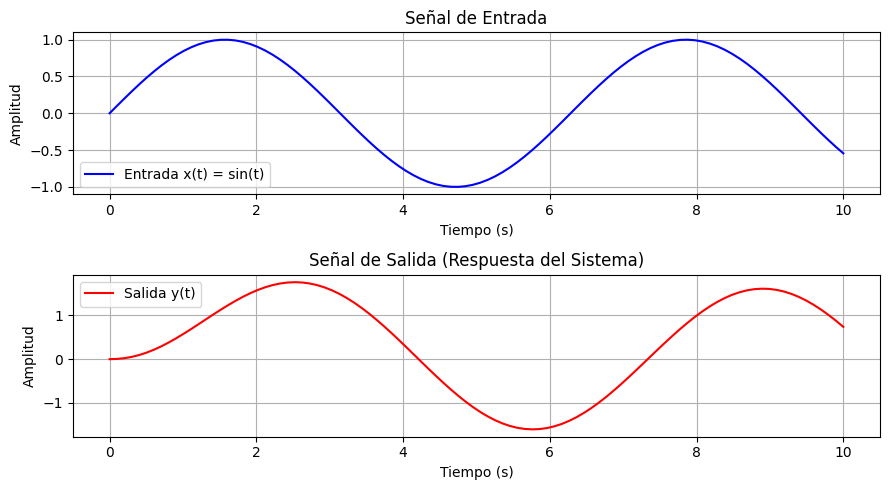

In [38]:
# 3. Simular la respuesta del sistema
# Le pasamos el sistema, nuestra señal de entrada 'x_in' y su vector de tiempo 't_in'
t_out, y_out, _ = lsim(sistema, U=x_in, T=t_in) # El guion bajo ignora el estado 'x_out'

# 4. Graficar la entrada y la salida
plt.figure(figsize=(9, 5))

# Subplot 1: La entrada
plt.subplot(2, 1, 1)
plt.plot(t_in, x_in, 'b-', label='Entrada x(t) = sin(t)')
plt.title('Señal de Entrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

# Subplot 2: La salida
plt.subplot(2, 1, 2)
plt.plot(t_out, y_out, 'r-', label='Salida y(t)')
plt.title('Señal de Salida (Respuesta del Sistema)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

plt.tight_layout() # Ajusta los gráficos para que no se superpongan
plt.show()

#### 4. Análisis en frecuencia

**¿Qué es?** La **respuesta en frecuencia** describe cómo responde el sistema a entradas senoidales de *diferentes* frecuencias (esto es el Diagrama de Bode).
Se obtiene evaluando la función de transferencia $H(s)$ en el eje imaginario, es decir, sustituyendo $s = j\omega$ (donde $\omega$ es la frecuencia angular en rad/s).

El resultado $H(j\omega)$ es un número complejo:
-   **$|H(j\omega)|$ (Magnitud):** Representa la ganancia (amplificación o atenuación) del sistema a esa frecuencia.
-   **$\angle H(j\omega)$ (Fase):** Representa el desfasaje que introduce el sistema a esa frecuencia.

**En Python:** Usamos el método `.freqresp()` (frequency response).

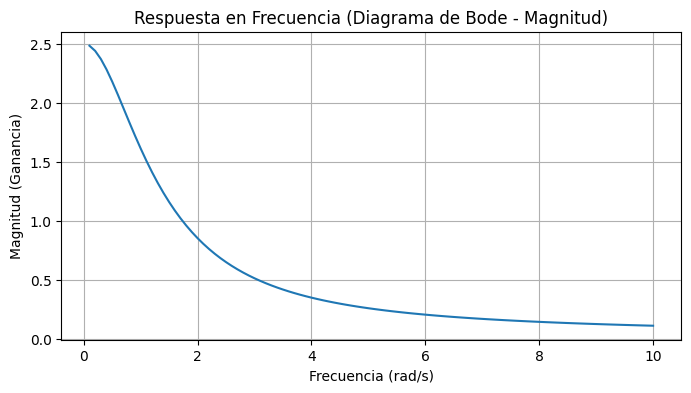

In [19]:
# 1. Definir el rango de frecuencias angulares (omega, ω) a analizar
# Creamos 100 puntos espaciados linealmente entre 0.1 y 10 rad/s
w_in = np.linspace(0.1, 10, 100)

# 2. Calcular la respuesta en frecuencia
# 'freqresp' evalúa H(jω) para cada ω en 'w_in'
# Devuelve las frecuencias (w_out) y la respuesta compleja (H_out)
w_out, H_out = sistema.freqresp(w=w_in)

# 3. Graficar la magnitud
# Usamos np.abs() para obtener la magnitud de la respuesta compleja H_out
plt.figure(figsize=(8, 4))
plt.plot(w_out, np.abs(H_out))
plt.xlabel('Frecuencia (rad/s)')
plt.ylabel('Magnitud (Ganancia)')
plt.title('Respuesta en Frecuencia (Diagrama de Bode - Magnitud)')
plt.grid(True)
plt.show()

#### 5. Polos y Ceros

**¿Qué son?** Los polos y ceros son las "huellas dactilares" del sistema en el plano complejo $s$.

-   **Ceros:** Son las raíces (los valores de $s$) que hacen que el **numerador** de $H(s)$ sea cero. Son las frecuencias para las cuales la respuesta del sistema es cero ($H(s) = 0$).
-   **Polos:** Son las raíces (los valores de $s$) que hacen que el **denominador** de $H(s)$ sea cero. Son las frecuencias para las cuales la respuesta del sistema tiende a infinito ($H(s) \to \infty$).

**¿Por qué son importantes?**
-   Los **polos** determinan la **estabilidad** del sistema. Un sistema es estable si todos sus polos tienen parte real negativa (están en el semiplano izquierdo del plano $s$).
-   Los **ceros** se utilizan para diseñar filtros, ya que pueden "anular" o atenuar fuertemente frecuencias específicas no deseadas.

**En Python:** El objeto `lti` ya los tiene calculados como propiedades: `.poles` y `.zeros`.

In [20]:
# Acceder a las propiedades de polos y ceros del objeto 'sistema'
polos = sistema.poles
ceros = sistema.zeros

print(f'Polos del sistema: {polos}')
print(f'Ceros del sistema: {ceros}')

# Verificamos la estabilidad
if np.all(np.real(polos) < 0):
    print("El sistema es ESTABLE (todos los polos tienen parte real negativa).")
else:
    print("El sistema es INESTABLE (al menos un polo tiene parte real no negativa).")

Polos del sistema: [-2. -1.]
Ceros del sistema: [-5.]
El sistema es ESTABLE (todos los polos tienen parte real negativa).


###  Ejercicio 3: Análisis de un Sistema LTI

**Objetivo:** Aplicar todo lo aprendido para analizar el sistema del ejercicio de gabinete 5b. del Trabajo práctico n° 7: Transformada de Laplace.

**Pasos:**
1.  **Definir el Sistema:**
    * Identifica los coeficientes del **numerador** y **denominador** de la función de transferencia $H(s)$ del ejercicio 5b.
    * Crea el objeto `sistema_e5b` usando `lti(numerador, denominador)`.
2.  **Analizar la Respuesta al Impulso:**
    * Calcula la respuesta al impulso usando `sistema_e5b.impulse()`.
    * Grafica $h(t)$.
    * Compara esta gráfica con la respuesta analítica $h(t)$ que calculaste a mano en el gabinete. ¿Coinciden?
3.  **Analizar Polos y Ceros:**
    * Imprime los `sistema_e5b.poles` y `sistema_e5b.zeros`.
    * Basándote en la ubicación de los polos, ¿el sistema es estable?
4.  **Analizar la Respuesta en Frecuencia:**
    * Calcula y grafica la magnitud de la respuesta en frecuencia usando `sistema_e5b.freqresp()`.
    * *Sugerencia:* Para un Diagrama de Bode estándar, usa `plt.xscale('log')` en tu gráfico.

### Animación Interactiva: Sistema LTI bajo entrada Senoidal

**Objetivo:** Visualizar cómo un sistema LTI responde a una señal de entrada senoidal a medida que cambiamos su frecuencia.

**Pasos:**
1.  **Importar librerías:** Importaremos `numpy`, `matplotlib.pyplot`, `scipy.signal` (para `lti` y `freqresp`) e `ipywidgets` (para la interactividad).
2.  **Definir el Sistema:** Crearemos el mismo objeto `sistema` $H(s) = \frac{s+5}{s^2 + 3s + 2}$ que hemos estado usando.
3.  **Calcular el Espectro (Estático):** La respuesta en frecuencia (Diagrama de Bode) del sistema es una característica *fija* del mismo. No cambia con la entrada. Para que la animación sea rápida, calcularemos este gráfico **una sola vez** al principio.
4.  **Definir la Función Interactiva:** Crearemos una función (`actualizar_grafico_lti`) que tome la frecuencia de entrada ($\omega$) como argumento.
5.  **Dentro de la función:**
    * Calcularemos el vector de tiempo `t` (adaptado para mostrar 5 ciclos de la $\omega$ seleccionada).
    * Calcularemos la señal de entrada $x(t) = \sin(\omega t)$.
    * Calcularemos la respuesta en **régimen permanente** $y(t)$.
    * Dibujaremos los tres gráficos: $x(t)$, $y(t)$, y el espectro $|H(j\omega)|$ con un punto en la $\omega$ seleccionada.
6.  **Crear el Widget:** Usaremos `interactive` para conectar un *slider* (deslizador) a nuestra función.

#### Paso 1 y 2: Importar librerías y Definir el Sistema

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lti, freqresp
from ipywidgets import interactive, widgets
from IPython.display import display

# 2. Definir el sistema H(s) = (s+5) / (s^2 + 3s + 2)
numerador = [1, 5]
denominador = [1, 3, 2]
sistema = lti(numerador, denominador)

#### Paso 3: Pre-calcular el Diagrama de Bode

Calculamos la respuesta en frecuencia del sistema en un rango amplio de frecuencias (de 0.1 a 100 rad/s). Estos vectores (`w_bode` y `mag_bode`) no cambiarán y los usaremos como "fondo" en nuestro gráfico de espectro.

In [47]:
# 3. Calcular la respuesta en frecuencia (Bode) una sola vez
# Definimos un rango amplio de frecuencias angulares (ω) para el gráfico de fondo
w_bode = np.logspace(-1, 2, 200) # 200 puntos entre 10^-1 (0.1) y 10^2 (100) rad/s

# Calculamos la respuesta en frecuencia compleja
w_out, H_complex = sistema.freqresp(w=w_bode)

# Calculamos la magnitud (en valores absolutos, no en dB)
mag_bode = np.abs(H_complex)

#### Paso 4 y 5: Definir la Función Interactiva

Esta es la función principal. Para la salida en régimen permanente $y(t)$, recordamos que para una entrada $x(t) = A \cdot \sin(\omega t)$, la salida será $y(t) = A \cdot |H(j\omega)| \cdot \sin(\omega t + \angle H(j\omega))$.

Usaremos `sistema.freqresp(w=[w_entrada])` para obtener la magnitud $|H(j\omega)|$ y la fase $\angle H(j\omega)$ en la frecuencia específica que elija el slider.

In [50]:
def actualizar_grafico_lti(w_entrada=1.0):

    # --- Cálculo de la Entrada y Salida en el Tiempo ---

    # 1. Definir un vector de tiempo 't' FIJO de 0 a 10 segundos
    t = np.linspace(0, 10, 500) # 500 puntos para una buena resolución

    # 2. Señal de entrada (Amplitud 1)
    x_in = np.sin(w_entrada * t)

    # 3. Calcular la respuesta en régimen permanente (Magnitud y Fase)
    w_ss, H_ss = sistema.freqresp(w=[w_entrada])
    magnitud_ss = np.abs(H_ss[0]) # Magnitud |H(jω)|
    fase_ss = np.angle(H_ss[0])     # Fase ∠H(jω)

    # 4. Señal de salida en régimen permanente
    y_ss = magnitud_ss * np.sin(w_entrada * t + fase_ss)

    # --- Creación de los Gráficos ---

    # 1. Tamaño de figura compacto
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 5.5))

    # Ajuste dinámico de los límites Y
    max_amp = max(1.0, magnitud_ss) * 1.2

    # --- Gráfico 1: Entrada x(t) ---
    ax1.plot(t, x_in, 'b-', label='Entrada x(t) = sin(t)')
    ax1.set_title(f'Entrada: $x(t) = \sin({w_entrada:.2f} \cdot t)$')
    ax1.set_xlabel('Tiempo (s)')
    ax1.set_ylabel('Amplitud')
    ax1.set_ylim(-max_amp, max_amp)
    ax1.set_xlim(0, 10) # Eje de tiempo FIJO
    ax1.legend()
    ax1.grid(True)

    # --- Gráfico 2: Salida y(t) ---
    ax2.plot(t, y_ss, 'r-', label='Salida y(t)')
    ax2.set_title(f'Salida Est. Estacionario: $y(t) = {magnitud_ss:.2f} \cdot \sin({w_entrada:.2f} \cdot t + {fase_ss:.2f})$')
    ax2.set_xlabel('Tiempo (s)')
    ax2.set_ylabel('Amplitud')
    ax2.set_ylim(-max_amp, max_amp)
    ax2.set_xlim(0, 10) # Eje de tiempo FIJO
    ax2.legend()
    ax2.grid(True)

    # --- Gráfico 3: Espectro de Amplitud (Bode) ---
    ax3.plot(w_bode, mag_bode, label='Magnitud $|H(j\omega)|$')
    ax3.plot(w_entrada, magnitud_ss, 'ro', markersize=10,
             label=f'Ganancia @ {w_entrada:.2f} rad/s = {magnitud_ss:.2f}')

    ax3.set_title('Respuesta en Frecuencia (Magnitud Lineal)')
    ax3.set_xlabel('Frecuencia (rad/s)')
    ax3.set_ylabel('Magnitud (Ganancia)')
    ax3.set_xscale('log') # Mantenemos el eje X logarítmico

    # *** ESTE ES EL CAMBIO SOLICITADO ***
    # Se cambia la escala Y a lineal (linear) en lugar de logarítmica (log)
    ax3.set_yscale('linear')

    # Ajustamos el grid para la nueva escala (solo 'major' en Y)
    ax3.grid(True, which='major', axis='y')
    ax3.grid(True, which='both', axis='x')

    ax3.legend()

    plt.tight_layout()
    plt.show()

<>:29: SyntaxWarning: invalid escape sequence '\s'
<>:29: SyntaxWarning: invalid escape sequence '\c'
<>:39: SyntaxWarning: invalid escape sequence '\c'
<>:39: SyntaxWarning: invalid escape sequence '\c'
<>:48: SyntaxWarning: invalid escape sequence '\o'
<>:29: SyntaxWarning: invalid escape sequence '\s'
<>:29: SyntaxWarning: invalid escape sequence '\c'
<>:39: SyntaxWarning: invalid escape sequence '\c'
<>:39: SyntaxWarning: invalid escape sequence '\c'
<>:48: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipython-input-373471857.py:29: SyntaxWarning: invalid escape sequence '\s'
  ax1.set_title(f'Entrada: $x(t) = \sin({w_entrada:.2f} \cdot t)$')
/tmp/ipython-input-373471857.py:29: SyntaxWarning: invalid escape sequence '\c'
  ax1.set_title(f'Entrada: $x(t) = \sin({w_entrada:.2f} \cdot t)$')
/tmp/ipython-input-373471857.py:39: SyntaxWarning: invalid escape sequence '\c'
  ax2.set_title(f'Salida Est. Estacionario: $y(t) = {magnitud_ss:.2f} \cdot \sin({w_entrada:.2f} \cdot t + {fase_s

#### Paso 6: Crear y Mostrar el Widget Interactivo

Finalmente, creamos el *slider* y lo conectamos a nuestra función.

In [51]:
# Creamos un slider para la frecuencia angular 'w_entrada'
# Rango de 0.1 a 20 rad/s (en pasos de 0.1)
w_slider = widgets.FloatSlider(
    value=1.0,
    min=0.1,
    max=20.0,
    step=0.1,
    description='Frecuencia $\omega$ (rad/s):',
    continuous_update=False, # Solo actualiza al soltar el mouse (más rápido)
    readout_format='.1f',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='80%')
)

# Creamos la visualización interactiva
interactive_plot_lti = interactive(
    actualizar_grafico_lti,
    w_entrada=w_slider
)

# Mostramos el widget
display(interactive_plot_lti)

<>:8: SyntaxWarning: invalid escape sequence '\o'
<>:8: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipython-input-3884908615.py:8: SyntaxWarning: invalid escape sequence '\o'
  description='Frecuencia $\omega$ (rad/s):',


interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='Frecuencia $\\omega$ (rad/s…

### 🔎 ¿Qué observar en el gráfico interactivo?

Esta simulación conecta los tres conceptos clave: la **entrada**, la **salida** y la **respuesta en frecuencia** (Bode) del sistema.

**¡Prueba esto!**

1.  **Mueve el slider de frecuencia $\omega$ lentamente de 0.1 a 20 rad/s.**
2.  **Observa los Gráficos 1 y 2 (Tiempo):**  verás cómo las ondas de entrada y salida "se comprimen" (su frecuencia aumenta) a medida que mueves el *slider* hacia la derecha.
3.  **Observa el Gráfico 3 (Bode):** Verás el punto rojo deslizarse a lo largo de la curva de magnitud. Fíjate que para este sistema (un filtro pasa-bajos), la ganancia es alta a bajas frecuencias (cercana a 2.5) y "cae" (se atenúa) a altas frecuencias.
4.  **Conecta los gráficos:**
    * **Amplitud:** Compara la amplitud de la señal de salida $y(t)$ con la de entrada $x(t)$ (que siempre es 1). Verás que cuando el punto rojo en el gráfico de Bode está alto (alta ganancia, $\omega$ baja), la amplitud de $y(t)$ es grande (ej: ganancia $\approx 2.5$). A medida que mueves el *slider* y el punto rojo "cae", la amplitud de $y(t)$ se hace cada vez más pequeña. ¡El sistema está atenuando esas frecuencias!
    * **Fase:** Observa el desfasaje (el "retraso") entre la onda de entrada (azul) y la de salida (roja). Verás que este desfasaje (indicado como $\angle H(j\omega)$ en el título del gráfico 2) también cambia a medida que cambia la frecuencia.